# Machine Learning Model Generation - Linear Regression

### 1. [Tutorial links](#tutorials)
### 2. [Load CSV File](#csv_file)
### 3. [Split the dataset. Technique: Train-Test split](#train_test)
### 4. [Generate Linear Regression Models](#linear)

> #### 4.1. [Linear Regression Model](#lr_train_test)
  #### 4.2. [Random Forest Model](#rf_train_test)
  #### 4.3. [XGBoost Regressor Model](#xgb_train_test)
  #### 4.4. [LightGBM Regressor Model](#lgb_train_test)
  #### 4.5. [Generalized Boosting Machine (GBM) Model](#gbm_train_test)

### 5. [Analyze the model results](#analyze_results)

> #### 5.1. [Scatter plot all the model results](#scatterplot_models)
#### 5.2. [Print RMSE of all models](#print_rmse)

### 6. [Train final model](#final_model)
### 7. [Save final model](#save_model)
### 8. [Load and use the model](#load_models)


> #### 8.1. [Load the model](#load_model)
#### 8.2. [Use the model](#use_model)


## <a id='tutorials'>1. Tutorial links</a>

### Load libraries

In [2]:
# Import pandas library
import pandas as pd

# Import numpy library
import numpy as np

# Import Train-Test split library
from sklearn.linear_model import LinearRegression

# Import RandomForestRegressor library
from sklearn.ensemble import RandomForestRegressor

# Import XGBRegressor library
from xgboost import XGBRegressor

# Import LightGBM library
import lightgbm as lgb

# Import GradientBoostingRegressor library
from sklearn.ensemble import GradientBoostingRegressor

# Import Train-Test split library
from sklearn.model_selection import train_test_split

# Import metrics computing library
from sklearn import metrics

# Import matplotlib library
import matplotlib.pyplot as plt
%matplotlib inline

# Import pickle library - helps store the model
import pickle

# Import warnings
import warnings
warnings.filterwarnings('ignore')

/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


### Source data location and data dictionary

### <a id='csv_file'>2. Load CSV file from Git/ Local<a>

In [6]:
# Load Concrete Data file from local file system
# concrete_data = pd.read_csv("data/concrete.csv")

# Load Concrete Data file from github
concrete_data = pd.read_csv("https://raw.githubusercontent.com/socratesk/YHatSchoolOfAI/master/data/concrete.csv")

# Print the shape
print (concrete_data.shape)

# Print few rows to visualize the data
concrete_data.head(8)

(1030, 9)


,cement,blast,flyash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45


In [7]:
concrete_data.dtypes

cement                  float64
blast                   float64
flyash                  float64
water                   float64
superplasticizer        float64
coarse_aggregate        float64
fine_aggregate          float64
age                       int64
compressive_strength    float64
dtype: object

## <a id='train_test'>3. Split the dataset. Technique: Train-Test split</a>

In [8]:

# Set the Train and Test split ratio to 80:20
SPLIT_RATIO = 0.2

# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(concrete_data.drop('compressive_strength',  axis = 1), 
                                                    concrete_data['compressive_strength'], 
                                                    test_size=SPLIT_RATIO, 
                                                    random_state = 225)

# Print the shape of the Train set
print("Train dataset: ", X_train.shape, Y_train.shape)

# Print the shape of the Test set
print("Test dataset: ", X_test.shape, Y_test.shape)

Train dataset:  (824, 8) (824,)
Test dataset:  (206, 8) (206,)


## <a id='linear'>4. Generate Linear Regression Models</a>

### <a id='lr_train_test'>4.1 Linear Regression Model</a>

In [9]:
# Generate a Linear Regression object
lr_model = LinearRegression()

# Train a Linear Regression model with Train dataset
lr_model.fit(X_train, Y_train)

# Predict the outcome
y_hat_lr = lr_model.predict(X_test)

# Compute the RMSE score and print it
rmse_lr = np.sqrt(metrics.mean_squared_error(Y_test, y_hat_lr))

# Compute RMSE score
print ("RMSE of Linear Regression model: ", rmse_lr)

RMSE of Linear Regression model:  10.19605957879761


#### 4.1.1 Print the Linear Regression Model

In [10]:
lr_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### 4.1.2 Print the Intercepts and Coefficients of Linear Regression Model

In [11]:
# Print Y-intercept
print ("Intercept of Linear Regression model: ", lr_model.intercept_, "\n")

# Print X-coefficients 
print ("Coefficients of Linear Regression model: ", lr_model.coef_, "\n") 

# Print X-coefficients along with feature names
# Before printing combine the feature names and their corresponding coefficients
coeff = dict(zip(concrete_data.drop('compressive_strength',  axis = 1).columns, lr_model.coef_))

# Print X-coefficients 
print ("Coefficients of Linear Regression model with features: ", coeff, "\n")

Intercept of Linear Regression model:  -38.93335491561968 

Coefficients of Linear Regression model:  [ 0.12024861  0.10612996  0.0927653  -0.12442753  0.32548598  0.02229789
  0.02741065  0.12093165] 

Coefficients of Linear Regression model with features:  {'cement': 0.1202486147756697, 'blast': 0.10612996310823046, 'flyash': 0.09276530339790859, 'water': -0.12442752542607127, 'superplasticizer': 0.3254859790589661, 'coarse_aggregate': 0.022297887040775552, 'fine_aggregate': 0.02741065279205698, 'age': 0.12093164580804337} 



#### 4.1.3 Scatter plot the 'Actual' and 'Predicted' values to visualize how they are related

Text(0.5, 1.0, "Scatter plot of 'Actual' and 'Predicted' values - Linear Regression")

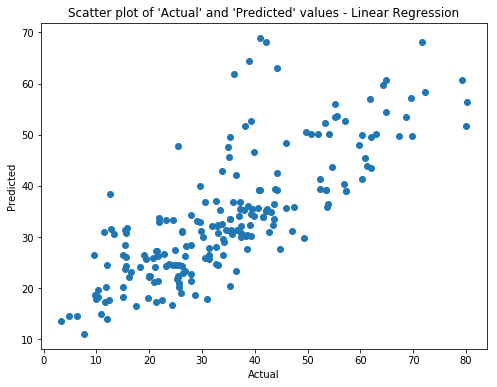

In [12]:
# Set the plotting area/ size
plt.figure(figsize = (8, 6))

# Scatter plot the Actual and Predicted values
plt.scatter(Y_test, y_hat_lr)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Scatter plot of 'Actual' and 'Predicted' values - Linear Regression")

#### 4.1.4 Check if the Model is overfit

In [13]:
# Predict the outcome of Train dataset
y_hat_train_lr = lr_model.predict(X_train)

# Compute the RMSE score and print it
rmse_train_lr = np.sqrt(metrics.mean_squared_error(Y_train, y_hat_train_lr))

# Compute RMSE score
print ("RMSE of Linear Regression model: ", rmse_train_lr)

RMSE of Linear Regression model:  10.417489654942571


### <a id='rf_train_test'>4.2 Random Forest Model</a>

In [25]:
# Generate a Random Forest Regressor object
rf_model = RandomForestRegressor(n_estimators=100, random_state=22)
rf_model1 = RandomForestRegressor(n_estimators=100, random_state=22)

# Train a Random Forest model with Train dataset
rf_model.fit(X_train, Y_train)
rf_model1.fit(X_test, Y_test)

# Predict the outcome
y_hat_rf = rf_model.predict(X_test)
y_hat_rf1 = rf_model1.predict(X_train)

# Compute the RMSE score and print it
rmse_rf = np.sqrt(metrics.mean_squared_error(Y_test, y_hat_rf))
rmse_rf1 = np.sqrt(metrics.mean_squared_error(Y_train, y_hat_rf1))

# Compute RMSE score
print ("RMSE of Random Forest model: ", rmse_rf)
print ("RMSE of Random Forest model-1: ", rmse_rf1)

RMSE of Random Forest model:  4.8952888729314825
RMSE of Random Forest model-1:  7.253264796428684


#### 4.2.1 Print the Random Forest Model

In [18]:
rf_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=22, verbose=0, warm_start=False)

#### 4.2.2 Scatter plot the 'Actual' and 'Predicted' values to visualize how they are related

Text(0.5, 1.0, "Scatter plot of 'Actual' and 'Predicted' values - Random Forest")

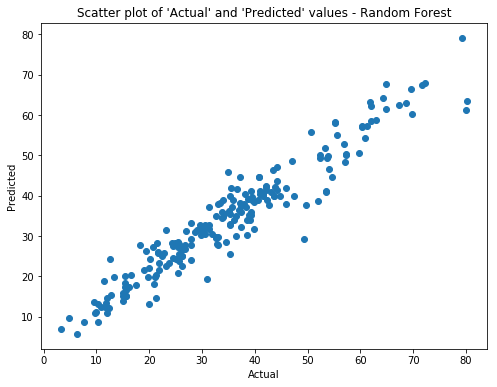

In [29]:
# Set the plotting area/ size
plt.figure(figsize = (8, 6))

# Plot the Actual and Predicted values
plt.scatter(Y_test, y_hat_rf)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Scatter plot of 'Actual' and 'Predicted' values - Random Forest")

### Question - How will the above plot look-like if it is a overfit model?

### <a id='xgb_train_test'>4.3 XGBoost Regressor Model</a>

In [39]:
# Generate a XGBoost object
xgb_model = XGBRegressor(learning_rate=0.05,  #  Rate of learning
                      subsample=0.75,         #  Subsample ratio of the training instances
                      colsample_bytree=0.72,  #  Subsample ratio of columns when constructing each tree
                      min_child_weight=6,     #  Min sum of instance weight needed in a child
                      objective='reg:squarederror', #  Linear Regression model
                      max_depth=8)

# TUTORIAL: https://xgboost.readthedocs.io/en/latest/parameter.html

# Train a XGBoost model with Train dataset
xgb_model.fit(X_train, Y_train)

# Predict the outcome
y_hat_xgb = xgb_model.predict(X_test)

# Compute the RMSE score and print it
rmse_xgb = np.sqrt(metrics.mean_squared_error(Y_test, y_hat_xgb))

# Compute RMSE score
print ("RMSE of XGBoost model: ", rmse_xgb)

RMSE of XGBoost model:  5.057429031674262


#### 4.3.1 Print the XGBoost Model

In [40]:
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.72, gamma=0,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=8, min_child_weight=6, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=0.75, verbosity=1)

#### 4.3.2 Scatter plot the 'Actual' and 'Predicted' values to visualize how they are related

Text(0.5, 1.0, "Scatter plot of 'Actual' and 'Predicted' values - XGBoost Regressor")

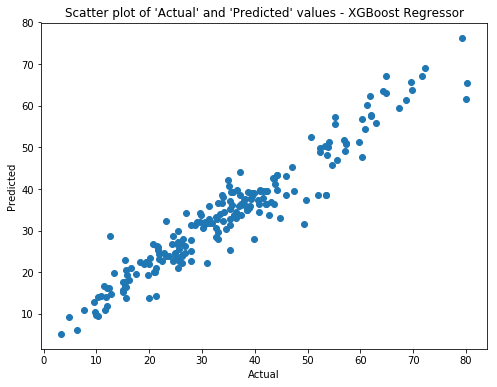

In [33]:
# Set the plotting area/ size
plt.figure(figsize = (8, 6))

# Plot the Actual and Predicted values
plt.scatter(Y_test, y_hat_xgb)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Scatter plot of 'Actual' and 'Predicted' values - XGBoost Regressor")

### <a id='lgb_train_test'>4.4 LightGBM Regressor Model</a>

In [93]:
d_train = lgb.Dataset(X_train, label=Y_train)

params = {}
params['learning_rate'] = 0.3
params['boosting_type'] = 'gbdt'      # gradient boosting decision tree
params['objective'] = 'regression'
params['metric'] = 'rmse'
params['sub_feature'] = 0.6           # subset of features on each iteration (tree)
params['num_leaves'] = 9             # max number of leaves in one tree
params['min_data'] = 5                # minimal number of data in one leaf
params['max_depth'] = 5               # max depth for tree model
params['seed'] = 5                    # seed

lgb_model = lgb.train(params=params, train_set=d_train, num_boost_round=100)    # no of trees

In [94]:
# Predict the outcome
y_hat_lgb = lgb_model.predict(X_test)

# Compute the RMSE score and print it
rmse_lgb = np.sqrt(metrics.mean_squared_error(Y_test, y_hat_lgb))

# Compute RMSE score
print ("RMSE of LightGBM model: ", rmse_lgb)

RMSE of LightGBM model:  4.4853612396609766


#### 4.4.1 Print the LightGBM Model

In [42]:
lgb_model

#### 4.4.2 Scatter plot the 'Actual' and 'Predicted' values to visualize how they are related

Text(0.5, 1.0, "Scatter plot of 'Actual' and 'Predicted' values - Light GBM")

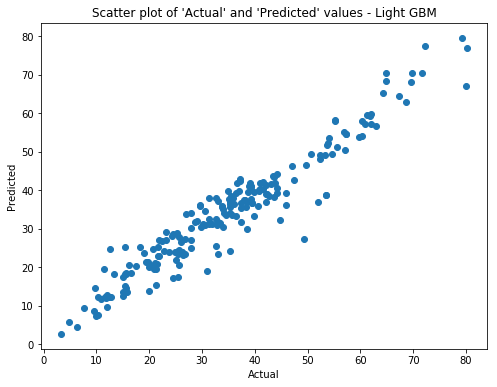

In [37]:
# Set the plotting area/ size
plt.figure(figsize = (8, 6))

# Plot the Actual and Predicted values
plt.scatter(Y_test, y_hat_lgb)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Scatter plot of 'Actual' and 'Predicted' values - Light GBM")

### <a id='gbm_train_test'>4.5 Gradient Boosting Machine (GBM) Model</a>

In [43]:
# Generate a Gradient Boosting Regressor object
gbm_model = GradientBoostingRegressor(n_estimators=100, min_samples_leaf=1, random_state=51)

# Train a  Gradient Boosting Regressor model with Train dataset
gbm_model.fit(X_train, Y_train)

# Predict the outcome
y_hat_gbm = gbm_model.predict(X_test)

# Compute the RMSE score and print it
rmse_gbm = np.sqrt(metrics.mean_squared_error(Y_test, y_hat_gbm))

# Compute RMSE score
print ("RMSE of  Gradient Boosting Regressor model: ", rmse_gbm)

RMSE of  Gradient Boosting Regressor model:  5.1223549948839615


#### 4.5.1 Print the Gradient Boosting Machine (GBM) Model

In [44]:
gbm_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=51, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

#### 4.5.2 Scatter plot the 'Actual' and 'Predicted' values to visualize how they are related

Text(0.5, 1.0, "Scatter plot of 'Actual' and 'Predicted' values - Gradient Boosting Machine")

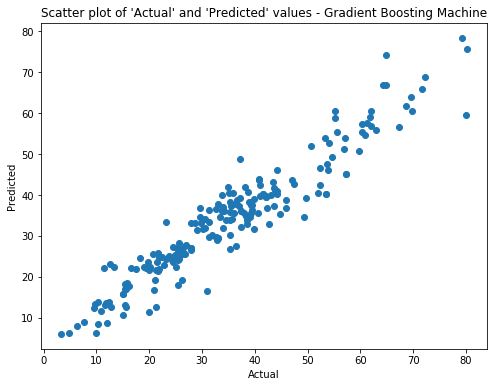

In [45]:
# Set the plotting area/ size
plt.figure(figsize = (8, 6))

# Plot the Actual and Predicted values
plt.scatter(Y_test, y_hat_gbm)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Scatter plot of 'Actual' and 'Predicted' values - Gradient Boosting Machine")

## <a id='analyze_results'>5. Analyze the model results</a>

### <a id='scatterplot_models'>5.1 Scatter plot all the model results</a>

Text(0.5, 1.0, 'Scatter plot Y-actual vs Y-hat - GBM')

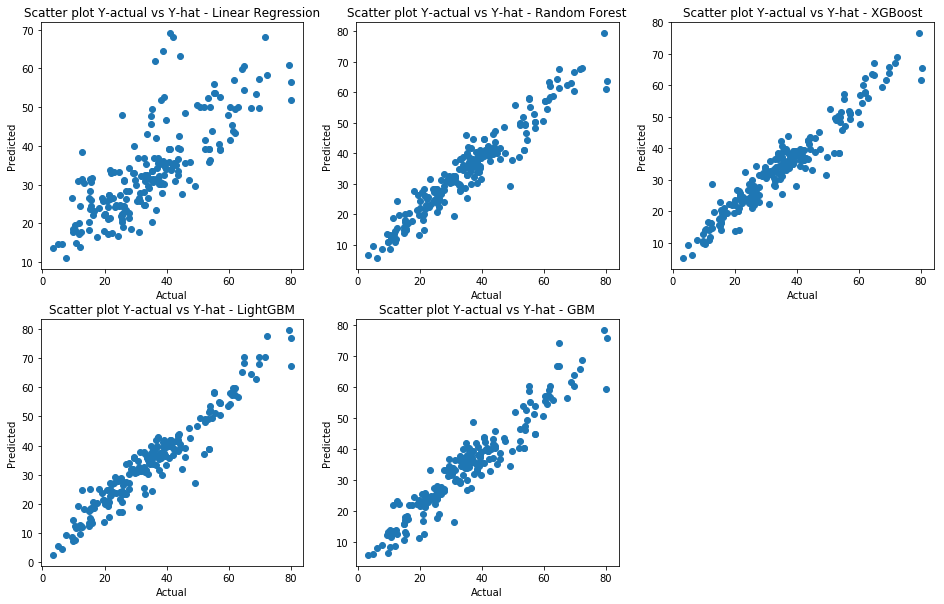

In [46]:
# Set plotting area/ size
plt.figure(1, figsize=(16, 10))

# Set first plot in a grid
plt.subplot(231)

# Plot the Actual and Predicted values
plt.scatter(Y_test, y_hat_lr)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Scatter plot Y-actual vs Y-hat - Linear Regression")

# --------------------------
# Set second plot in a grid
plt.subplot(232)

# Plot the Actual and Predicted values
plt.scatter(Y_test, y_hat_rf)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Scatter plot Y-actual vs Y-hat - Random Forest")

# --------------------------
# Set third plot in a grid
plt.subplot(233)

# Plot the Actual and Predicted values
plt.scatter(Y_test, y_hat_xgb)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Scatter plot Y-actual vs Y-hat - XGBoost")

# --------------------------
# Set fourth plot in a grid
plt.subplot(234)

# Plot the Actual and Predicted values
plt.scatter(Y_test, y_hat_lgb)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Scatter plot Y-actual vs Y-hat - LightGBM")

# --------------------------
# Set fifth plot in a grid
plt.subplot(235)

# Plot the Actual and Predicted values
plt.scatter(Y_test, y_hat_gbm)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Scatter plot Y-actual vs Y-hat - GBM")

### <a id='print_rmse'>5.2 Print RMSE of all models</a>

In [47]:
rmse_df = pd.DataFrame(
                    {'Linear Regression': [rmse_lr],
                    'Random Forest': [rmse_rf],
                    'XGBoost': [rmse_xgb],
                    'LightGBM': [rmse_lgb],
                    'GBM': [rmse_gbm]}
)

rmse_df

,Linear Regression,Random Forest,XGBoost,LightGBM,GBM
0,10.19606,4.895289,5.057429,4.626158,5.122355


#### While choosing the best model, do not just choose by looking at the lower RMSE value alone. Consider how the data is scattered along the axis, too.

#### In this case, based on the above graph and RMSE values, the LightGBM model looks promising. So, if I am particular about selecting only one model as final, I would choose the LightGBM model.

## <a id='final_model'>6. Train final model</a>

In [95]:
d_train = lgb.Dataset(concrete_data.drop('compressive_strength', axis = 1), concrete_data['compressive_strength'])

params = {}
params['learning_rate'] = 0.3
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'rmse'
params['sub_feature'] = 0.6
params['num_leaves'] = 9
params['min_data'] = 5
params['max_depth'] = 5
params['seed'] = 5      

lgb_final_model = lgb.train(params=params, train_set=d_train, num_boost_round=100)

## <a id='save_model'>7. Save final model</a>

In [96]:
# Persist the final model
filename = 'concrete_lgbm_final_model_ver_1_0.sav'
pickle.dump(lgb_final_model, open(filename, 'wb'))

# Runtime ....

## <a id='load_models'>8. Load and use the model</a>

### <a id='load_model'>8.1 Load the model</a>

In [97]:
# load the model from disk
filename = 'concrete_lgbm_final_model_ver_1_0.sav'
loaded_model = pickle.load(open(filename, 'rb'))

### <a id='use_model'>8.2 Use the model</a>

#### 8.2.1 Gather input data. This will be from UI, application, or request object

In [99]:
# Collect the input data. USER INPUT
cement = 250                                  # int(request.form['cement'])
blast = 0.0                                   # int(request.form['blast'])
flyash = 97                                   # int(request.form['flyash'])
water = 145                                   # int(request.form['water'])
superplasticizer = 14                         # int(request.form['superplasticizer'])
coarse_aggregate = 950                        # int(request.form['coarse_aggregate'])
fine_aggregate = 890                          # int(request.form['fine_aggregate'])
age = 15                                      # int(request.form['age'])

#### 8.2.2 Form a dataframe using the User-Input

In [100]:
# Form a dataframe with the user input. This approach is originally explained in Pandas class.
# Note the '[',  ']' bracket around the input values below. This is because, for Pandas, the values have to be in the LIST form.
input_df = pd.DataFrame({
                    'cement': [cement],
                    'blast': [blast],
                    'flyash': [flyash],
                    'water': [water],
                    'superplasticizer': [superplasticizer],
                    'coarse_aggregate': [coarse_aggregate],
                    'fine_aggregate': [fine_aggregate], 
                    'age': [age]
                    }
)

# ****** NOTE: If you have done any feature engineering in the training set, then the same thing has to be 
# ****** carried-out in user-input as well. This is the right place where you have to carry-out the 
# ****** feature update on the input dataset.

# Print the input request dataframe
input_df

,cement,blast,flyash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,250,0.0,97,145,14,950,890,15


#### 8.2.3 Predict Outcome

In [101]:
# Predict the outcome for the input values using ML model.
# The result will be returned as NumPy array, even for one instance/ datapoint
comp_strength = loaded_model.predict(input_df)

# Print the predicted value
print('Predicted compressive strength of the concrete: ', comp_strength[0] , 'MPa')

Predicted compressive strength of the concrete:  31.552569648191582 MPa
